In [15]:
import tensorflow as tf

In [16]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


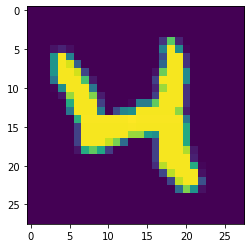

In [17]:
import matplotlib.pyplot as plt
plt.imshow ( x_train[20] )
plt.show()

In [18]:
x_train,x_test = x_train.astype('float32'), x_test.astype('float32')

x_train,x_test = x_train.reshape([-1,784]), x_test.reshape([-1, 784])
x_train, x_test = x_train/255. , x_test/ 255.

y_train, y_test = tf.one_hot(y_train, depth= 10),tf.one_hot(y_test, depth= 10)


In [19]:
train_data = tf.data.Dataset.from_tensor_slices(( x_train, y_train ))
train_data = train_data.repeat().shuffle(60000).batch(50)
train_data_iter = iter( train_data)

In [28]:
class CNN(tf.keras.Model):
  def __init__(self):
    super(CNN, self).__init__()
   
    self.conv_layer_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu')
    self.pool_layer_1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)

    self.conv_layer_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same', activation='relu')
    self.pool_layer_2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)
   
    self.flatten_layer = tf.keras.layers.Flatten()
    self.fc_layer_1 = tf.keras.layers.Dense( 1024, activation='relu')

    self.output_layer = tf.keras.layers.Dense(10, activation=None)


  def call(self, x ):
   
    x_image = tf.reshape (x, [-1,28,28,1])

    h_conv1 = self.conv_layer_1(x_image)
    h_pool1 = self.pool_layer_1(h_conv1)
    h_conv2 = self.conv_layer_2(h_pool1)
    h_pool2 = self.pool_layer_2(h_conv2)
  
    h_pool2_flat = self.flatten_layer(h_pool2)
    h_fc1 = self.fc_layer_1(h_pool2_flat)
    
    logits = self.output_layer(h_fc1)
    y_pred = tf.nn.softmax(logits)

    return y_pred, logits

# cross-entropy 손실 함수를 정의합니다.
@tf.function
def cross_entropy_loss(logits, y):
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))

# 최적화를 위한 RMSprop 옵티마이저를 정의합니다.
optimizer = tf.optimizers.Adam(1e-4)

# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(model, x, y ):
  with tf.GradientTape() as tape:
    y_pred, logits = model(x )
    loss = cross_entropy_loss(logits, y)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

# 모델의 정확도를 출력하는 함수를 정의합니다.
@tf.function
def compute_accuracy(y_pred, y):
  correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  return accuracy

# Convolutional Neural Networks(CNN) 모델을 선언합니다.
CNN_model = CNN()

In [29]:
# 10000 Step만큼 최적화를 수행합니다.
for i in range(10000):
  batch_x, batch_y = next(train_data_iter)

  # 100 Step마다 training 데이터셋에 대한 정확도와 loss를 출력합니다.
  if i % 100 == 0:
    train_accuracy = compute_accuracy(CNN_model(batch_x)[0], batch_y)
    print("반복(Epoch): %d, 트레이닝 데이터 정확도: %f" % (i, train_accuracy))

  train_step(CNN_model, batch_x, batch_y )

print(" 정확도: %f" % compute_accuracy(CNN_model(x_test)[0], y_test)) 

반복(Epoch): 0, 트레이닝 데이터 정확도: 0.060000
반복(Epoch): 100, 트레이닝 데이터 정확도: 0.760000
반복(Epoch): 200, 트레이닝 데이터 정확도: 0.920000
반복(Epoch): 300, 트레이닝 데이터 정확도: 0.880000
반복(Epoch): 400, 트레이닝 데이터 정확도: 0.940000
반복(Epoch): 500, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 600, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 700, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 800, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 900, 트레이닝 데이터 정확도: 1.000000
반복(Epoch): 1000, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 1100, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 1200, 트레이닝 데이터 정확도: 0.980000
반복(Epoch): 1300, 트레이닝 데이터 정확도: 1.000000
반복(Epoch): 1400, 트레이닝 데이터 정확도: 1.000000


KeyboardInterrupt: ignored